In [18]:
from copy import deepcopy
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import Image
from skimage.draw import line, disk


In [2]:
import scipy.io
calorimeter_response_protons = scipy.io.loadmat("calorimeter_response.mat")
secondary_protons = scipy.io.loadmat("secondary.mat")
calorimeter_response_antiprotons = scipy.io.loadmat("calorimeter_response_antiprotons.mat")
secondary_antiprotons = scipy.io.loadmat("secondary_antiprotons.mat")

In [3]:
data = deepcopy(calorimeter_response_protons)

In [4]:
data

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Tue May 21 14:33:20 2024',
 '__version__': '1.0',
 '__globals__': [],
 'E_0': array([[1745.39, 2859.57, 1433.08, ..., 4222.97, 6916.87, 6589.18]]),
 'X_0': array([[-72.9942, -37.1207, -69.118 , ...,  47.0039, -61.3038, -20.493 ]]),
 'Y_0': array([[ 11.0633, -85.0243, -33.8059, ...,  22.3615,  62.9135,  47.3031]]),
 'theta_0': array([[0.503032 , 0.56611  , 0.0662649, ..., 0.768048 , 0.606821 ,
         0.0842612]]),
 'phi_0': array([[0.17943, 4.36732, 2.73976, ..., 3.22291, 3.3012 , 3.24898]]),
 'Z_end': array([[139.821  ,   3.40819, 213.576  , ..., 101.     , 125.106  ,
         213.576  ]]),
 'last_process': array(['protonInelastic', 'protonInelastic', 'Transportation ', ...,
        'protonInelastic', 'Transportation ', 'Transportation '],
       dtype='<U15'),
 'event_ID': array([[   0.,    0.,    0., ..., 9999., 9999., 9999.]]),
 'layer': array([[ 0.,  1.,  2., ..., 41., 42., 43.]]),
 'index_along_x': array([[19., 20

In [5]:
X = data['X_0']
shape_X = X.shape
shape_X


(1, 10000)

In [6]:
plane_yz_np_data = np.array(data['X_0'])
plane_xz_np_data = np.array(data['Y_0'])
plane_yz_np_data

array([[-72.9942, -37.1207, -69.118 , ...,  47.0039, -61.3038, -20.493 ]])

In [7]:
secondary_protons

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Tue May 21 14:33:22 2024',
 '__version__': '1.0',
 '__globals__': [],
 'secondary': array([[array([[ 1.00000e+00,  2.21200e+03, -7.29942e+01,  1.10633e+01,
                 -1.00000e+00,  1.74539e+03],
                [ 1.00000e+00,  2.21200e+03, -7.24528e+01,  1.11615e+01,
                  0.00000e+00,  1.74539e+03],
                [ 1.00000e+00,  2.21200e+03, -7.22470e+01,  1.11989e+01,
                  3.80000e-01,  1.74523e+03],
                ...,
                [ 2.00000e+00,  1.10000e+01, -5.99821e+01,  1.37972e+01,
                  2.41625e+01,  1.38636e-01],
                [ 2.00000e+00,  1.10000e+01, -5.99977e+01,  1.38232e+01,
                  2.41018e+01,  9.32497e-02],
                [ 2.00000e+00,  1.10000e+01, -6.00138e+01,  1.38341e+01,
                  2.40692e+01,  0.00000e+00]])                          ,
         array([[ 1.00000e+00,  2.21200e+03, -3.71207e+01, -8.50243e+01,
               

In [8]:
sys.path.append(r'/Users/pavelnehaenko/Downloads/pamela-master/src')  

In [9]:
from calorimeter import calo_importer

In [10]:
fnum = 1
dpath = '/Users/pavelnehaenko/Desktop/me/kursach/simulation' 
siminfofile = 'protons/SimInfo/SimInfo_pr_0p1_1500_rig_F0p8_10000000_1.mat'.format(fnum)
siminfo_data = scipy.io.loadmat(os.path.join(dpath, siminfofile), variable_names=['caloplaneint', 'fTHETA', 'fPHI'])

In [11]:
siminfo_data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Dec 26 08:55:45 2021',
 '__version__': '1.0',
 '__globals__': [],
 'caloplaneint': array([[ 9],
        [44],
        [44],
        ...,
        [31],
        [44],
        [44]], dtype=uint8),
 'fPHI': array([[2.88771],
        [2.04032],
        [5.38962],
        ...,
        [5.56478],
        [1.8101 ],
        [2.51839]]),
 'fTHETA': array([[0.10897  ],
        [0.0970378],
        [0.107277 ],
        ...,
        [0.270176 ],
        [0.166132 ],
        [0.272713 ]])}

In [12]:
nn = range(1, 1001)
dfile = 'protons/CaloStrip/CaloStrip_pr_0p1_1500_rig_F0p8_10000000_1.mat'.format(fnum)
calo_events = calo_importer.import_data(os.path.join(dpath, dfile), events=nn)

.mat file loaded


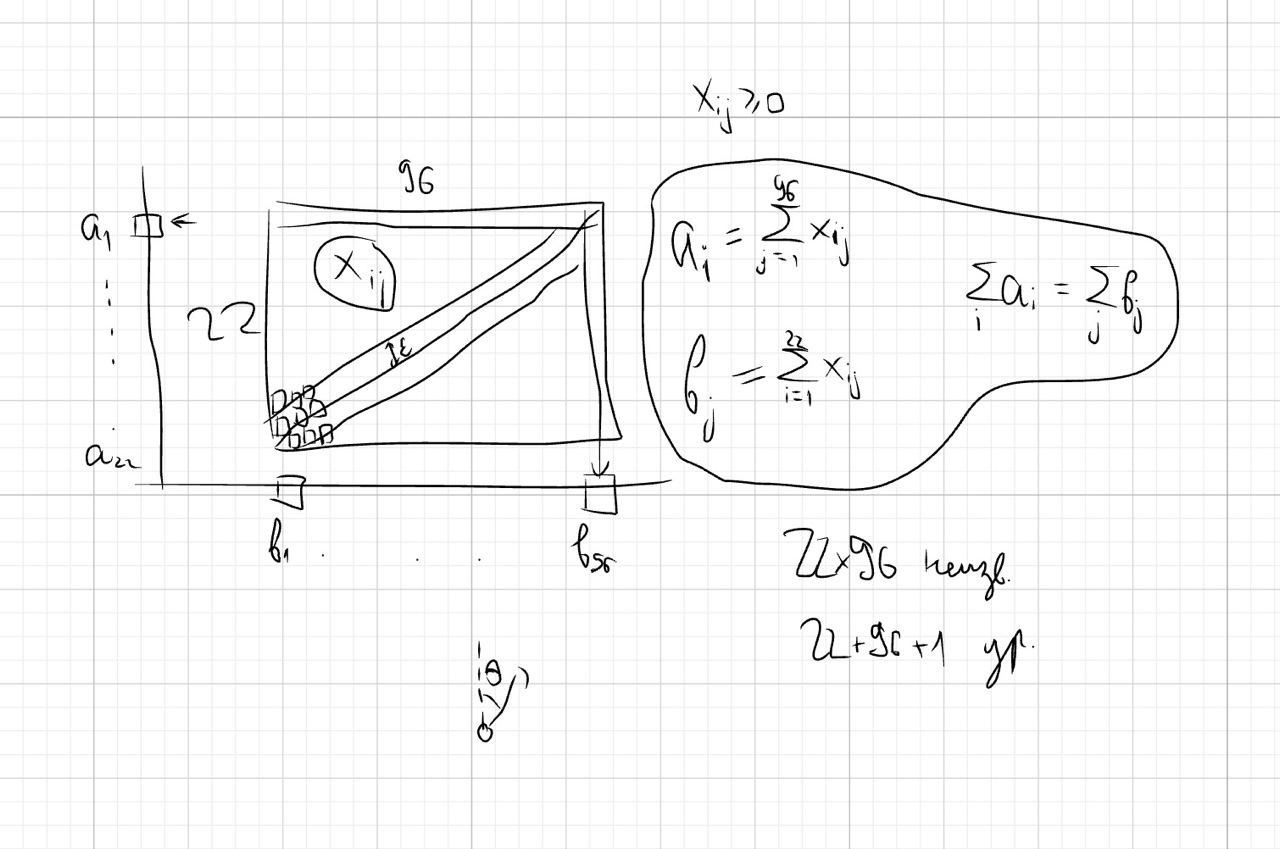

In [13]:
Image('1.jpg')

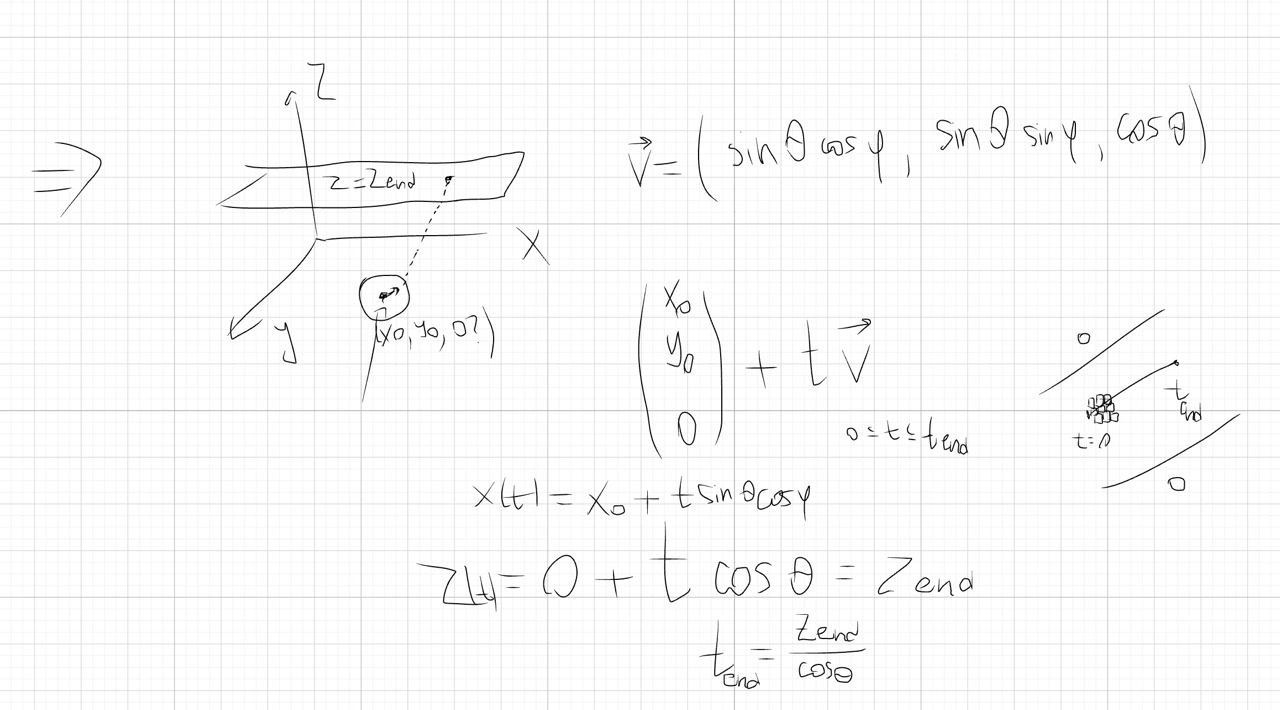

In [14]:
Image('2.jpg')

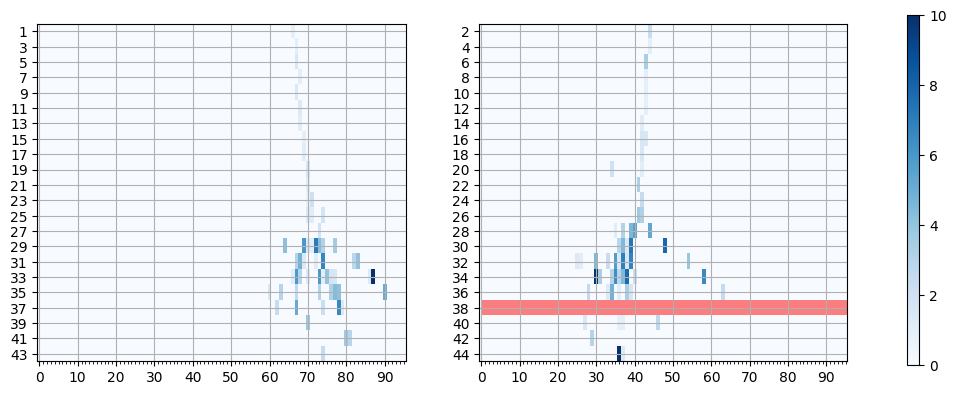

In [104]:
# Изображение проекции калориметра
calo_events[21].plot()

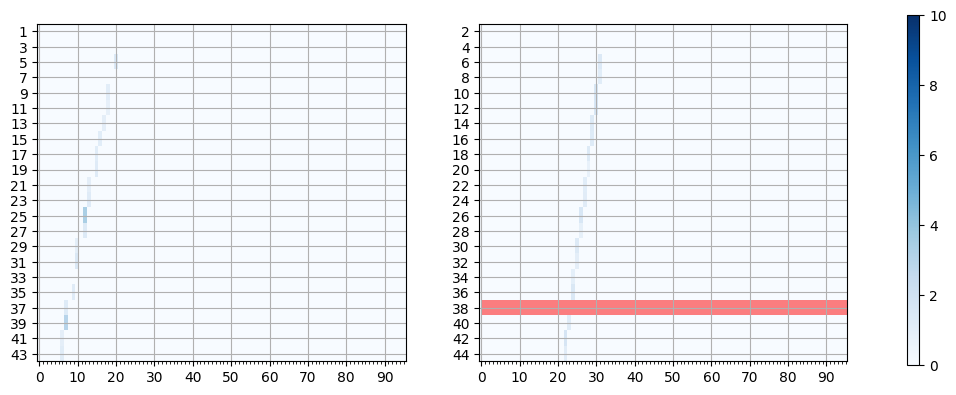

In [95]:
# Изображение проекции калориметра
calo_events[20].plot()

In [167]:
for i in range(calo_events[20].x_projection().shape[0]):
    print("слой {}: {}".format(i+1, calo_events[20].x_projection()[i, :]))


слой 1: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
слой 2: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
слой 3: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         1.33700001 0.         0.         0.         0.
 0.         0.         0.         0.

AttributeError: 'dict' object has no attribute 'tibarX'

In [134]:
theta_0 = data['theta_0']
phi_0 = data['phi_0']
X_0 = data['X_0']
Y_0 = data['Y_0']
Z_end = data['Z_end']

# Построение вектора v
v_x = np.sin(theta_0) * np.cos(phi_0)
v_y = np.sin(theta_0) * np.sin(phi_0)
v_z = np.cos(theta_0)

# Параметр t_end
t_end = Z_end / v_z

print("Векторы v:", v_x, v_y, v_z)
print("t_end:", t_end)

Векторы v: [[ 0.47434458 -0.18142761 -0.060942   ... -0.69243685 -0.56301078
  -0.08367672]] [[ 0.08603696 -0.50473611  0.02589762 ... -0.05643157 -0.09063157
  -0.00902052]] [[0.87612491 0.84399377 0.99780528 ... 0.71926816 0.82146502 0.99645212]]
t_end: [[159.59025714   4.03816962 214.04576951 ... 140.42050801 152.29619904
  214.3364389 ]]


In [84]:
print(data['X_0'][0,20], data['Y_0'][0,20])

72.2045 78.6796


In [73]:
def is_smudged(projection, track_points, epsilon):
    # Определить сглаженные треки
    smudged_tracks = []
    for i in range(1, len(track_points)):
        # Определить начальную и конечную точки отрезка трека
        start_point = track_points[i-1]
        end_point = track_points[i]

        # Использовать алгоритм Брезенхема для построения отрезка, соединяющего начальную и конечную точки трека
        line_points = line(*start_point, *end_point)

        # Определить эпсилон-окрестность вокруг этого отрезка
        epsilon_neighborhood = np.zeros_like(projection)
        for point in zip(*line_points):
            x, y = point
            rr, cc = disk((x, y), epsilon)
            epsilon_neighborhood[rr, cc] = 1

        # Проверить, сколько энерговыделения находится внутри эпсилон-окрестности, и сколько находится снаружи
        inside_energy = np.sum(projection[epsilon_neighborhood == 1])
        outside_energy = np.sum(projection[epsilon_neighborhood == 0])

        # Если внутри эпсилон-окрестности находится больше энерговыделения, чем снаружи, то трек считается сглаженным
        if inside_energy > outside_energy:
            smudged_tracks.append(i)

    return smudged_tracks

# Определить точки трека на основе данных проекций калориметра
#track_points = np.column_stack((data['X_0'][0,20], data['Z_end'][0,20]))




In [74]:
x_projection = calo_events[20].x_projection()[data['layer'][0,21] % 2 == 0]
y_projection = calo_events[20].y_projection()[data['layer'][0,21] % 2 == 0]

data['X_0'][0,20]

72.2045

In [79]:
track_points = np.column_stack((data['X_0'][0,21][data['layer'][0,21] % 2 == 0], data['Z_end'][0,21][data['layer'][0,21] % 2 == 0]))

# Определить сглаженные треки
smudged_tracks = is_smudged(x_projection, track_points, epsilon=50000)

smudged_tracks

[]

In [72]:
smudged_tracks

[]